In [29]:
#Objective:
    #Learn various types of clustering algorithms as available in sklearn
#Clustering techniques reference:
#    http://scikit-learn.org/stable/modules/clustering.html#clustering

## 1.0 Call libraries
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics

from sklearn import cluster, mixture              # For clustering
from sklearn.preprocessing import StandardScaler  # For scaling dataset

import sys                    # For data size

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth
%matplotlib inline

# 2. Read data
X = pd.read_csv("../input/2017.csv")

# 3. Explore and scale
X.columns.values
X.shape                 # 155 X 12
country=X[X.columns[0]] 
X = X.iloc[:, 2: ]      # Ignore Country and Happiness_Rank columns
X.head(2)


,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


In [30]:
# 3.1 Normalize dataset for easier parameter selection
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#    Standardize features by removing the mean
#      and scaling to unit variance
# 3.1.2 Instantiate scaler object
ss = StandardScaler()
# 3.1.3 Use ot now to 'fit' &  'transform'
ss.fit_transform(X)

#### 4. Begin Clustering   
                                  
# 5.1 How many clusters
#     NOT all algorithms require this parameter
n_clusters = 2

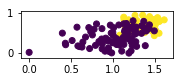

In [31]:
## 5 KMeans
# Ref: http://scikit-learn.org/stable/modules/clustering.html#k-means                                  
# KMeans algorithm clusters data by trying to separate samples in n groups
#  of equal variance, minimizing a criterion known as the within-cluster
#   sum-of-squares.                         

# 5.1 Instantiate object
km = cluster.KMeans(n_clusters =n_clusters )

# 5.2.1 Fit the object to perform clustering
km_result = km.fit_predict(X)

# 5.3 Draw scatter plot of two features, coloyued by clusters
plt.subplot(4, 2, 1)
plt.scatter(X.iloc[:, 4], X.iloc[:, 5],  c=km_result)


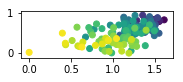

In [32]:
## 6. Mean Shift
# http://scikit-learn.org/stable/modules/clustering.html#mean-shift
# This clustering aims to discover blobs in a smooth density of samples.
#   It is a centroid based algorithm, which works by updating candidates
#    for centroids to be the mean of the points within a given region.
#     These candidates are then filtered in a post-processing stage to
#      eliminate near-duplicates to form the final set of centroids.
# Parameter: bandwidth dictates size of the region to search through. 

# 6.1
bandwidth = 0.1  

# 6.2 No of clusters are NOT predecided
ms = cluster.MeanShift(bandwidth=bandwidth)

# 6.3
ms_result = ms.fit_predict(X)

# 6.4
plt.subplot(4, 2, 2)
plt.scatter(X.iloc[:, 4], X.iloc[:, 5],  c=ms_result)


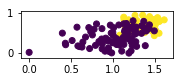

In [33]:
## 7. Mini Batch K-Means
#  Ref: 
#     http://scikit-learn.org/stable/modules/clustering.html#mini-batch-k-means
#  Similar to kmeans but clustering is done in batches to reduce computation time

# 7.1 
two_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)

# 7.2
two_means_result = two_means.fit_predict(X)

# 7.3
plt.subplot(4, 2, 3)
plt.scatter(X.iloc[:, 4], X.iloc[:, 5],  c= two_means_result)


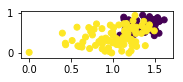

In [34]:
## 8. Spectral clustering
# http://scikit-learn.org/stable/modules/clustering.html#spectral-clustering    
# SpectralClustering does a low-dimension embedding of the affinity matrix
#  between samples, followed by a KMeans in the low dimensional space. It
#   is especially efficient if the affinity matrix is sparse.
#   SpectralClustering requires the number of clusters to be specified.
#     It works well for a small number of clusters but is not advised when 
#      using many clusters.

# 8.1
spectral = cluster.SpectralClustering(n_clusters=n_clusters)

# 8.2
sp_result= spectral.fit_predict(X)

# 8.3
plt.subplot(4, 2, 4)
plt.scatter(X.iloc[:, 4], X.iloc[:, 5],  c=sp_result)

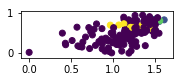

In [35]:
## 9. DBSCAN
# http://scikit-learn.org/stable/modules/clustering.html#dbscan
#   The DBSCAN algorithm views clusters as areas of high density separated
#    by areas of low density. Due to this rather generic view, clusters found
#     by DBSCAN can be any shape, as opposed to k-means which assumes that
#      clusters are convex shaped.    
#    Parameter eps decides the incremental search area within which density
#     should be same

eps = 0.3

# 9.1 No of clusters are NOT predecided
dbscan = cluster.DBSCAN(eps=eps)

# 9.2
db_result= dbscan.fit_predict(X)

# 9.3
plt.subplot(4, 2, 5)
plt.scatter(X.iloc[:, 4], X.iloc[:, 5], c=db_result)

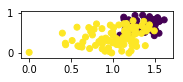

In [36]:
# 10. Affinity Propagation
# Ref: http://scikit-learn.org/stable/modules/clustering.html#affinity-propagation    
# Creates clusters by sending messages between pairs of samples until convergence.
#  A dataset is then described using a small number of exemplars, which are
#   identified as those most representative of other samples. The messages sent
#    between pairs represent the suitability for one sample to be the exemplar
#     of the other, which is updated in response to the values from other pairs. 
#       Two important parameters are the preference, which controls how many
#       exemplars are used, and the damping factor which damps the responsibility
#        and availability messages to avoid numerical oscillations when updating
#         these messages.

damping = 0.9
preference = -200

# 10.1  No of clusters are NOT predecided
affinity_propagation = cluster.AffinityPropagation(
        damping=damping, preference=preference)

# 10.2
affinity_propagation.fit(X)

# 10.3
ap_result = affinity_propagation .predict(X)

# 10.4
plt.subplot(4, 2, 6)
plt.scatter(X.iloc[:, 4], X.iloc[:, 5],  c=ap_result)

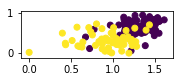

In [37]:
## 11. Birch
# http://scikit-learn.org/stable/modules/clustering.html#birch    
# The Birch builds a tree called the Characteristic Feature Tree (CFT) for the
#   given data and clustering is performed as per the nodes of the tree

# 11.1
birch = cluster.Birch(n_clusters=n_clusters)

# 11.2
birch_result = birch.fit_predict(X)

# 11.3
plt.subplot(4, 2, 7)
plt.scatter(X.iloc[:, 4], X.iloc[:, 5],  c=birch_result)


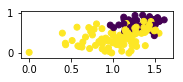

In [38]:
# 14. Gaussian Mixture modeling
#  http://203.122.28.230/moodle/course/view.php?id=6&sectionid=11#section-3
#  It treats each dense region as if produced by a gaussian process and then
#  goes about to find the parameters of the process

# 14.1
gmm = mixture.GaussianMixture( n_components=n_clusters, covariance_type='full')

# 14.2
gmm.fit(X)

# 14.3
gmm_result = gmm.predict(X)
plt.subplot(4, 2, 8)
plt.scatter(X.iloc[:, 4], X.iloc[:, 5],  c=gmm_result)

#########################################################